### 3.1 

In [50]:
import pandas as pd
import networkx as nx
import random
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv('twitter-small.tsv', sep='\t', header=None,names=['timestamp', 'user', 'content'])
df2 = pd.read_csv('twitter-larger.tsv', sep='\t', header=None,names=['timestamp', 'user', 'content'])
print(df1)

                 timestamp             user  \
0      2009-06-11 17:03:30  hatespeechradio   
1      2009-06-11 17:13:11  champagnemanoir   
2      2009-06-11 17:14:01     emperoranton   
3      2009-06-11 17:15:20   seattlelawgirl   
4      2009-06-11 17:23:56        fridayluv   
...                    ...              ...   
39935  2009-06-30 13:35:58      looney_mesh   
39936  2009-06-30 13:37:13        kasyyoung   
39937  2009-06-30 13:49:31   kimberanna_com   
39938  2009-06-30 13:49:49   kimberanna_com   
39939  2009-06-30 13:54:27    reneebarronmn   

                                                 content  
0      #followfriday (because I like to be a day earl...  
1      RT @Ruth_Z don't tweet blindly... check out ho...  
2      RT @Ohdoctah @micah @sarahrobinson Twitter Fol...  
3      BTW, it's not #FollowFriday but @go2girlevents...  
4      On Fridays don&#8217;t &#8216;pollute your str...  
...                                                  ...  
39935  Vote @Studmisil

In [11]:
def makeList(df, G, name):
    for index, row in df.iterrows():
        user = row['user']
        content = row['content']

        words = content.split()
        mentioned_users = [word[1:] for word in words if word.startswith('@')]
        
        for mentioned_user in mentioned_users:
            if G.has_edge(user, mentioned_user):
                #add weight when user has mentioned before
                G[user][mentioned_user]['weight'] += 1
            else:
                #else, create edge
                G.add_edge(user, mentioned_user, weight=1)

    edge_list = nx.to_pandas_edgelist(G)
    edge_list.to_csv(f'{name}.csv', index=False)
    return G

In [13]:
G1 = nx.DiGraph()
G2 = nx.DiGraph()

G1 = makeList(df1, G1, 'small')
G2 = makeList(df2, G2, 'larger')

### 3.2

In [14]:
def showNodesAndEdges(G, name):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    
    print(f'{name} nodes:', num_nodes)
    print(f'{name} edges:', num_edges)
    
showNodesAndEdges(G1, 'G1')
showNodesAndEdges(G2, 'G2')

G1 nodes: 102999
G1 edges: 157025
G2 nodes: 620352
G2 edges: 1360894


In [16]:
def showWeakAndStrong(G, name):
    strong_components = [len(c) for c in nx.strongly_connected_components(G)]
    num_strong_components = len(strong_components)
    largest_strong_component = max(strong_components) if strong_components else 0

    weak_components = [len(c) for c in nx.weakly_connected_components(G)]
    num_weak_components = len(weak_components)
    largest_weak_component = max(weak_components) if weak_components else 0

    print(f'{name} strongly connected components:', num_strong_components)
    print(f'{name} size of largest strongly connected component:', largest_strong_component)
    print(f'{name} weakly connected components:', num_weak_components)
    print(f'{name} size of largest weakly connected component:', largest_weak_component)

showWeakAndStrong(G1, 'G1')
showWeakAndStrong(G2, 'G2')

G1 strongly connected components: 101612
G1 size of largest strongly connected component: 1110
G1 weakly connected components: 4419
G1 size of largest weakly connected component: 85860
G2 strongly connected components: 598527
G2 size of largest strongly connected component: 20068
G2 weakly connected components: 17865
G2 size of largest weakly connected component: 564050


In [17]:
def showDensity(G, name):
    density = nx.density(G)
    print(f'{name} density:', density)

showDensity(G1, 'G1')
showDensity(G2, 'G2')

G1 density: 1.4801543373296188e-05
G2 density: 3.536296131767815e-06


In [20]:
#average clustering coefficient
def showACC(G, name):
    ACC = nx.average_clustering(G)
    print(f'{name} average clustering coefficient:', ACC)

showACC(G1, 'G1')
showACC(G2, 'G2')

G1 average clustering coefficient: 0.019285324303747912
G2 average clustering coefficient: 0.030628227982516916


In [29]:
def showAverageDistance(G, name, sample_size=100):
    G_undirected = G.to_undirected()
    largest_component = max(nx.connected_components(G_undirected), key=len)
    giant_component = G_undirected.subgraph(largest_component)
    nodes = list(giant_component.nodes)
    sampled_nodes = random.sample(nodes, min(sample_size, len(nodes)))
    
    total_distance = 0
    num_pairs = 0

    for i in range(len(sampled_nodes)):
        for j in range(i + 1, len(sampled_nodes)):
            try:
                distance = nx.shortest_path_length(giant_component, source=sampled_nodes[i], target=sampled_nodes[j])
                total_distance += distance
                num_pairs += 1
            except nx.NetworkXNoPath:
                continue  

    average_distance = total_distance / num_pairs if num_pairs > 0 else float('inf')
    print(f'{name} average distance:', average_distance)

showAverageDistance(G1, 'G1', 100)
showAverageDistance(G2, 'G2', 100)

G1 average distance: 6.616161616161616
G2 average distance: 5.515555555555555


# 3.3

In [38]:
df = pd.read_csv('data.csv')
print(df)

                     Id  Label  indegree  outdegree  Degree  \
0       hatespeechradio    NaN         0          1       1   
1          gaustenbooks    NaN         1          0       1   
2       champagnemanoir    NaN         3         23      26   
3                Ruth_Z    NaN         4          0       4   
4              guide2pc    NaN         2          2       4   
...                 ...    ...       ...        ...     ...   
102971          reeb...    NaN         1          0       1   
102972        reebom...    NaN         1          0       1   
102973        2500group    NaN         1          0       1   
102974  rhiannonldavies    NaN         0          2       2   
102975       gaboiler07    NaN         0          1       1   

        weighted indegree  weighted outdegree  Weighted Degree  pageranks  \
0                       0                   1                1   0.000008   
1                       1                   0                1   0.000015   
2           

In [43]:
#normalize data from three measures
scaler = MinMaxScaler()
df[['Degree', 'closnesscentrality', 'betweenesscentrality']] = scaler.fit_transform(
    df[['Degree', 'closnesscentrality', 'betweenesscentrality']]
)

#combine
df['combined_score'] = df['Degree'] + df['closnesscentrality'] + df['betweenesscentrality']

top_20_combined = df.nlargest(20, 'combined_score')[['Id', 'combined_score']]

print("Top 20 users based on combined centrality score:")
print(top_20_combined)

Top 20 users based on combined centrality score:
                    Id  combined_score
259    americandream09        1.818023
1018   tamaraschilling        1.488092
1607         medic_ray        1.197041
520          centerpet        1.193588
44      straightstreet        1.170543
2735     lauralassiter        1.136938
8624          petxpert        1.124998
223      bacieabbracci        1.090947
59477      core_appler        1.077508
22342         imyourdj        1.074468
17307        marismith        1.067802
1604     lindseymalone        1.067051
21571        shelton45        1.063599
7311         casalinda        1.063552
11662            u_way        1.062510
1170      entreprediva        1.059437
4393        lizarddawg        1.057793
1398   traveleverywher        1.056576
13797          theloon        1.053041
1513          noxhanti        1.051745


# 3.4

In [48]:
G_undirected = G1.to_undirected()
largest_component = max(nx.connected_components(G_undirected), key=len)
giant_component = G_undirected.subgraph(largest_component)

communities = nx.community.louvain_communities(giant_component, weight='weight')

# Display the detected communities
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {sorted(community)}")

Community 1: ['2explode', '360o', 'Adamastorlx', 'AdolfoM:', 'Aeongotbeats', 'AffirmationSp', 'AhhPhotography', 'AhhPhotography.', 'Aisle424', 'AlanHChin', 'AlexandraOnline', 'AlissaFereday:', 'AnaMariaOliveir', 'AnaRC', 'AndreaMatarazzo', 'AnnieInfinite', 'AnnieM11', 'AnnieSage', 'Any_Amount', 'Any_Amount:', 'Apdeites', 'Apriss', 'ArturAnjos', 'ArturAnjos:', 'AscensoSimoes', 'AskMen_com', 'BELAI83', 'Bail88ge', 'BeatlesTweets', 'BelleNoirMag', 'Bezmoney', 'BigBearrG', 'BizProfitsUSA:', 'BlackEagleMedia', 'BrunoBernardino', 'BuzzFS', 'BuzzFS:', 'CN_', 'CSaCarneiro', 'CTVtoronto', 'Capacid', 'Carlagalmeida', 'CarlosCoelhoPE', 'CarlosDan', 'CarlosLima7', 'Caro65', 'CaroleMyers', 'CashGrower007', 'Cassius_Designs', 'CatBlogs', 'CatalystLeader', 'CatiaFerreira', 'CharlieShrem', 'CheGrand', 'CheerGirl20', 'ChildrensCare', 'ChrisSaad', 'ClaudiaProudPJ', 'Collect_able', 'CreativeOpera', 'CrossRefSearch', 'Cyphertek', 'DANGO547', 'DJSMOKKE', 'DallenWrites', 'DanLHays', 'DaniJones06', 'DanielaB

## 3.5

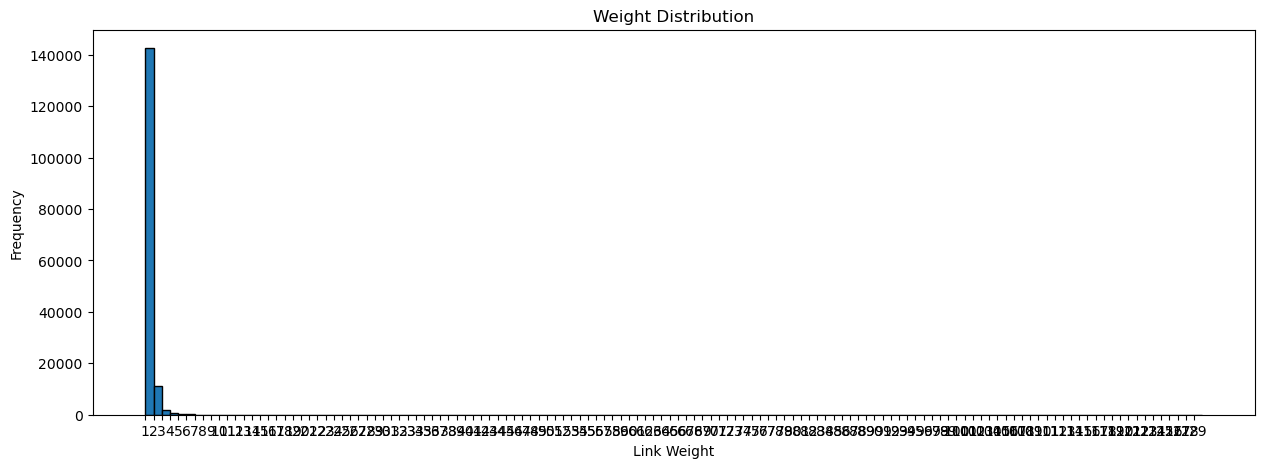

In [57]:
link_weights = [data['weight'] for _, _, data in G1.edges(data=True) if 'weight' in data]
link_weights_series = pd.Series(link_weights)

plt.figure(figsize=(15, 5))
plt.hist(link_weights_series, bins=range(int(min(link_weights)), int(max(link_weights)) + 2), edgecolor='black')
plt.xlabel('Link Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution')
plt.xticks(range(int(min(link_weights)), int(max(link_weights)) + 1))
plt.show()

## museum

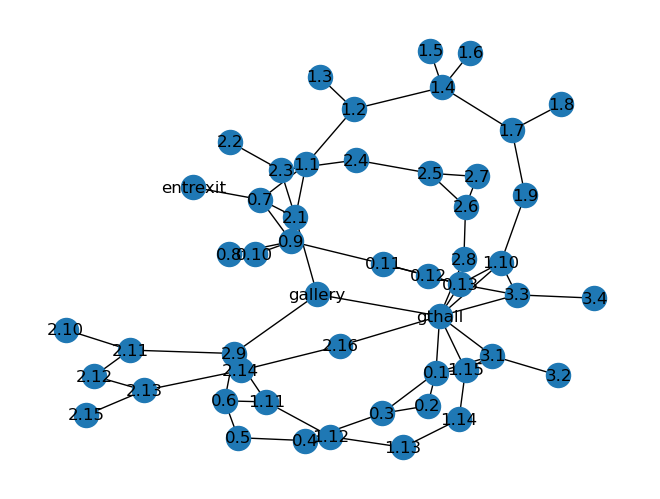

In [69]:
G = nx.Graph()

# Define nodes (each room)
nodes = [
    "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "0.10", "0.11", "0.12", "0.13",
    "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "1.8", "1.9", "1.10", "1.11", "1.12", "1.13", "1.14", "1.15",
    "2.1", "2.2", "2.3", "2.4", "2.5", "2.6", "2.7", "2.8", "2.9", "2.10", "2.11", "2.12", "2.13", "2.14", "2.15", "2.16",
    "gallery", "gthall", "entrexit", "3.1", "3.2", "3.3"
]

# Add nodes to the graph
G.add_nodes_from(nodes)

# Define edges based on the given layout (including stair and door connections)
edges = [
    ("0.1", "0.2"), ("0.1", "0.3"), ("0.1", "1.15"), ("0.1", "gthall"), ("0.1", "3.1"),
    ("0.2", "0.3"), ("0.3", "0.4"), ("0.4", "0.5"), ("0.5", "0.6"),
    ("0.6", "2.9"), ("0.6", "1.11"), ("0.7", "entrexit"), ("0.7", "0.9"), ("0.7", "1.1"), ("0.7", "2.1"),
    ("0.8", "0.9"), ("0.9", "0.10"), ("0.9", "0.11"), ("0.11", "0.12"), ("0.11", "0.13"), ("0.12", "0.13"),
    ("0.13", "1.10"), ("0.13", "gthall"), ("0.13", "3.3"), ("1.1", "2.1"), ("1.1", "1.2"),
    ("1.2", "1.3"), ("1.2", "1.4"), ("1.4", "1.5"), ("1.4", "1.6"), ("1.4", "1.7"),
    ("1.7", "1.8"), ("1.7", "1.9"), ("1.9", "1.10"), ("1.10", "gthall"), ("1.10", "3.3"),
    ("1.11", "2.9"), ("1.11", "1.12"), ("1.12", "1.13"), ("1.13", "1.14"), ("1.13", "1.14"), ("1.14", "1.15"),
    ("1.15", "gthall"), ("1.15", "3.1"), ("2.1", "2.3"), ("2.1", "gallery"), ("2.2", "2.3"),
    ("2.3", "2.4"), ("2.4", "2.5"), ("2.5", "2.6"), ("2.5", "2.7"), ("2.6", "2.7"), ("2.6", "2.8"),
    ("2.8", "gthall"), ("gthall", "2.16"), ("gthall", "gallery"), ("gthall", "3.1"), ("gthall", "3.3"),
    ("2.9", "gallery"), ("2.9", "2.11"), ("2.10", "2.11"), ("2.11", "2.12"), ("2.12", "2.13"),
    ("2.13", "2.14"), ("2.13", "2.15"), ("2.14", "2.16"), ("3.1", "3.2"), ("3.3", "3.4")
]

G.add_edges_from(edges)
nx.draw(G, with_labels = True)